In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('protein-data-set\pdb_data_no_dups.csv')
data_seq = pd.read_csv('protein-data-set\pdb_data_seq.csv')

In [3]:
data['publicationYear'].min()

201.0

In [4]:
py= data.groupby("publicationYear").structureId.count()

In [5]:
py.drop(labels = 201.0, inplace = True)

In [7]:
clas = (data.classification.value_counts())[0:20]
clas

HYDROLASE                                20915
TRANSFERASE                              15777
OXIDOREDUCTASE                           12494
LYASE                                     4329
IMMUNE SYSTEM                             4075
TRANSCRIPTION                             3691
TRANSPORT PROTEIN                         3251
SIGNALING PROTEIN                         2904
HYDROLASE/HYDROLASE INHIBITOR             2677
ISOMERASE                                 2602
VIRAL PROTEIN                             2320
LIGASE                                    2133
PROTEIN BINDING                           1892
DNA                                       1765
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     1738
MEMBRANE PROTEIN                          1731
TRANSFERASE/TRANSFERASE INHIBITOR         1695
DNA BINDING PROTEIN                       1517
RIBOSOME                                  1462
METAL BINDING PROTEIN                     1383
Name: classification, dtype: int64

In [8]:
data_seq.macromoleculeType.value_counts()

Protein                       345180
Protein#RNA                    56226
Protein#DNA                    21303
DNA                             3784
Protein#DNA#RNA                 2712
RNA                             2389
Protein#RNA#DNA/RNA Hybrid       304
Protein#DNA#DNA/RNA Hybrid       159
DNA/RNA Hybrid                   141
DNA#RNA                          121
RNA#DNA/RNA Hybrid                74
Protein#DNA/RNA Hybrid            68
DNA#DNA/RNA Hybrid                26
Name: macromoleculeType, dtype: int64

In [9]:
df = data.merge(data_seq, how ="inner", on ="structureId")

In [10]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType_x', 'residueCount_x', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'chainId', 'sequence',
       'residueCount_y', 'macromoleculeType_y'],
      dtype='object')

In [11]:
df.drop(['residueCount_y', 'macromoleculeType_y'], axis =1, inplace = True)

In [12]:
df = df[df['macromoleculeType_x'] == "Protein"]

In [13]:
df.shape

(345201, 16)

In [14]:
data_seq.shape

(467304, 5)

In [15]:
df['macromoleculeType_x'].nunique()

1

In [16]:
df.isnull().sum()

structureId                      0
classification                   1
experimentalTechnique            0
macromoleculeType_x              0
residueCount_x                   0
resolution                   16052
structureMolecularWeight         0
crystallizationMethod       105433
crystallizationTempK        102106
densityMatthews              38743
densityPercentSol            38609
pdbxDetails                  51514
phValue                      86957
publicationYear              50705
chainId                          2
sequence                         3
dtype: int64

In [17]:
df = df[pd.notnull(df['sequence'])]
df = df[pd.notnull(df['classification'])]
df.isnull().sum()

structureId                      0
classification                   0
experimentalTechnique            0
macromoleculeType_x              0
residueCount_x                   0
resolution                   16052
structureMolecularWeight         0
crystallizationMethod       105433
crystallizationTempK        102106
densityMatthews              38743
densityPercentSol            38609
pdbxDetails                  51514
phValue                      86956
publicationYear              50705
chainId                          2
sequence                         0
dtype: int64

In [18]:
index_to_drop = df.loc[df['sequence'].str.contains('(^XXXX)+')].index

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [19]:
df.drop(index = index_to_drop, inplace = True)
df.shape

(343832, 16)

In [23]:
index_to_drop = df.loc[df['sequence'].str.contains('[A-Z]*B[A-Z]*')].index



In [25]:
df.drop(index = index_to_drop, inplace = True)
df.shape

(343826, 16)

In [26]:
index_to_drop = df.loc[df['sequence'].str.contains('[A-Z]*J[A-Z]*')].index
df.drop(index = index_to_drop, inplace = True)
index_to_drop = df.loc[df['sequence'].str.contains('[A-Z]*U[A-Z]*')].index
df.drop(index = index_to_drop, inplace = True)
index_to_drop = df.loc[df['sequence'].str.contains('[A-Z]*X[A-Z]*')].index
df.drop(index = index_to_drop, inplace = True)
index_to_drop = df.loc[df['sequence'].str.contains('[A-Z]*Z[A-Z]*')].index
df.drop(index = index_to_drop, inplace = True)
index_to_drop = df.loc[df['sequence'].str.contains('[A-Z]*O[A-Z]*')].index
df.drop(index = index_to_drop, inplace = True)

In [27]:
df.shape

(337306, 16)

In [29]:
df_prot = df[["structureId", "classification", "sequence", "chainId"]]

In [30]:
df_prot["seq_length"] = df_prot["sequence"].apply(len)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_prot = df_prot[df_prot['seq_length'] > 20]

In [32]:
df_prot.shape

(327342, 5)

In [33]:
df_prot.columns

Index(['structureId', 'classification', 'sequence', 'chainId', 'seq_length'], dtype='object')

In [34]:
clas=(df_prot.classification.value_counts())
clas

HYDROLASE                                  44945
TRANSFERASE                                35386
OXIDOREDUCTASE                             33417
IMMUNE SYSTEM                              13868
LYASE                                      11481
HYDROLASE/HYDROLASE INHIBITOR              10095
TRANSPORT PROTEIN                           8201
VIRAL PROTEIN                               8169
TRANSCRIPTION                               7928
VIRUS                                       6920
ISOMERASE                                   6294
SIGNALING PROTEIN                           5999
LIGASE                                      4808
MEMBRANE PROTEIN                            4600
PROTEIN BINDING                             4498
STRUCTURAL PROTEIN                          4194
CHAPERONE                                   3991
STRUCTURAL GENOMICS, UNKNOWN FUNCTION       3527
SUGAR BINDING PROTEIN                       3213
DNA BINDING PROTEIN                         3098
ELECTRON TRANSPORT  

In [35]:
clas_prot = df_prot.groupby("classification").structureId.count().sort_values(ascending = False)[0:20]

In [36]:
df_prot_fin = df_prot[df_prot['classification'].isin(clas_prot.keys())]
df_prot_fin.shape

(224632, 5)

In [37]:
clas=(df_prot_fin.classification.value_counts())
clas

HYDROLASE                                44945
TRANSFERASE                              35386
OXIDOREDUCTASE                           33417
IMMUNE SYSTEM                            13868
LYASE                                    11481
HYDROLASE/HYDROLASE INHIBITOR            10095
TRANSPORT PROTEIN                         8201
VIRAL PROTEIN                             8169
TRANSCRIPTION                             7928
VIRUS                                     6920
ISOMERASE                                 6294
SIGNALING PROTEIN                         5999
LIGASE                                    4808
MEMBRANE PROTEIN                          4600
PROTEIN BINDING                           4498
STRUCTURAL PROTEIN                        4194
CHAPERONE                                 3991
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     3527
SUGAR BINDING PROTEIN                     3213
DNA BINDING PROTEIN                       3098
Name: classification, dtype: int64

In [39]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

df_prot_fin['class label']=label_encoder.fit_transform(df_prot_fin['classification'])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
df_prot_fin.head()

,structureId,classification,sequence,chainId,seq_length,class label
67,117E,HYDROLASE,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,A,286,2
68,117E,HYDROLASE,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,B,286,2
74,11AS,LIGASE,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,A,330,6
75,11AS,LIGASE,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,B,330,6
76,11BA,HYDROLASE,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,A,124,2


In [41]:
# Implementing TfIdf first

from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf_transformer = TfidfVectorizer(analyzer = "char_wb", ngram_range= (4,4), sublinear_tf= True )

In [43]:
tfidf_transformer.fit(df_prot_fin['sequence'][0:100])

TfidfVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(4, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [44]:
vector = tfidf_transformer.transform(df_prot_fin['sequence'][0:100])

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
dist = 1 - cosine_similarity(vector)

In [47]:
from sklearn.cluster import KMeans

num_clusters = 20

km = KMeans(n_clusters=num_clusters)

%time km.fit(vector)

clusters = km.labels_.tolist()

Wall time: 3.1 s


In [48]:
from sklearn import metrics

In [52]:
labels_true= df_prot_fin[0:100]['class label'].tolist()

In [53]:
labels_pred=clusters

In [54]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.24642277405257815

By using Tf_Idf vectorizer for 100 entries we get adjusted random index value as 0.24 which is low efficiency


In [55]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.3318191227626133

In [56]:
metrics.homogeneity_score(labels_true, labels_pred)

0.7748570271206987

In [57]:
metrics.completeness_score(labels_true, labels_pred)

0.4715194712670003

In [58]:
metrics.v_measure_score(labels_true, labels_pred)

0.5862757781586833

In [59]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.3783583912745656

In [71]:
tfidf_transformer = TfidfVectorizer(analyzer = "char_wb", ngram_range= (2,4), sublinear_tf= True )

In [72]:
tfidf_transformer.fit(df_prot_fin['sequence'][0:100])

TfidfVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [73]:
vector = tfidf_transformer.transform(df_prot_fin['sequence'][0:100])

In [74]:
clas=(df_prot_fin[0:100].classification.value_counts())
clas

TRANSFERASE                      30
HYDROLASE                        22
OXIDOREDUCTASE                   17
HYDROLASE/HYDROLASE INHIBITOR    17
VIRAL PROTEIN                     5
LIGASE                            5
ISOMERASE                         2
CHAPERONE                         1
LYASE                             1
Name: classification, dtype: int64

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
dist = 1 - cosine_similarity(vector)

In [77]:
from sklearn.cluster import KMeans

num_clusters = 9

km = KMeans(n_clusters=num_clusters)

%time km.fit(vector)

clusters = km.labels_.tolist()

Wall time: 4.48 s


In [78]:
from sklearn import metrics

In [79]:
labels_true= df_prot_fin[0:100]['class label'].tolist()

In [80]:
labels_pred=clusters

In [81]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.11018841706506097

Now we will switch to calculating similarity measure and obtaining eigen vectors as features
Using BLOSUM 62
pass the vector of 8 dimension to kmeans
change the distance metric to euclidean manhattan etc

In [82]:
# Function for aligning two sequences
def align_score(str1, str2, m, n):
    gap=-10
    
    l=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V' ]
    
    blosum62 = [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0],
            [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
            [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3 ],
            [-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
            [ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
            [-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
            [-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2 ],
            [ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
            [-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
            [-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
            [-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
            [-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2,],
            [-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
            [-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
            [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
            [1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
            [0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1 ,-2, -1,  1,  5, -2, -2,  0],
            [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
            [-2, -2, -2, -3, -2, -1, -2, -3 , 2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
            [0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4, -3]
        ]


   
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)] 
  
 
    for i in range(m + 1): 
        for j in range(n + 1): 

            if i == 0: 
                dp[i][j] = j*gap   
            elif j == 0: 
                dp[i][j] = i*gap    
            elif str1[i-1] == str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap ) 
  
            elif str1[i-1]!=str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap )    
  
    return dp[m][n] 

In [87]:
X=df_prot_fin[['structureId','sequence']][0:100]

In [88]:
n=len(X)

In [89]:
n

100

In [90]:
import numpy as np
arr=np.empty([n, n])
for i in range(0,n):
    for j in range(0,n):
        if i==j:
            arr[i][j]=0
        else:
            arr[i][j]=align_score(X.iloc[i][1],X.iloc[j][1],len(X.iloc[i][1]),len(X.iloc[j][1]))

In [91]:
beta=10
similarity = np.exp(-beta * arr / arr.std())
print(similarity)

[[1.00000000e+00 1.91604343e-06 1.59846870e+01 ... 4.18060379e+01
  4.18060379e+01 4.18060379e+01]
 [1.91604343e-06 1.00000000e+00 1.59846870e+01 ... 4.18060379e+01
  4.18060379e+01 4.18060379e+01]
 [1.59846870e+01 1.59846870e+01 1.00000000e+00 ... 6.66476773e+00
  6.66476773e+00 6.66476773e+00]
 ...
 [4.18060379e+01 4.18060379e+01 6.66476773e+00 ... 1.00000000e+00
  1.16792912e-07 1.16792912e-07]
 [4.18060379e+01 4.18060379e+01 6.66476773e+00 ... 1.16792912e-07
  1.00000000e+00 1.16792912e-07]
 [4.18060379e+01 4.18060379e+01 6.66476773e+00 ... 1.16792912e-07
  1.16792912e-07 1.00000000e+00]]


In [92]:
from sklearn.manifold import spectral_embedding

In [93]:
print("eigen:")
get_sim=spectral_embedding(similarity)
print(get_sim)
print(get_sim.shape)

eigen:
[[ 7.91199396e-10 -7.18660009e-09  4.93346176e-08  1.30262669e-07
  -2.72985981e-08  1.91862723e-07  4.09574997e-07  2.72156861e-07]
 [ 7.91199396e-10 -7.18660009e-09  4.93346174e-08  1.30262671e-07
  -2.72985992e-08  1.91862724e-07  4.09574888e-07  2.72156904e-07]
 [ 4.38106759e-10 -2.48254602e-09  5.01491911e-08  5.60749281e-08
   4.40807814e-08 -1.10488328e-07 -1.34777138e-08 -1.60178729e-07]
 [ 4.38106759e-10 -2.48254602e-09  5.01491911e-08  5.60749281e-08
   4.40807814e-08 -1.10488328e-07 -1.34777103e-08 -1.60178730e-07]
 [-2.55371925e-10 -1.32358457e-09  1.66916023e-08 -4.06476539e-09
   2.06469026e-09 -5.35923094e-09 -3.38750535e-10 -8.63738686e-10]
 [-2.55371925e-10 -1.32358457e-09  1.66916023e-08 -4.06476539e-09
   2.06469026e-09 -5.35923094e-09 -3.38750677e-10 -8.63738642e-10]
 [-2.55371925e-10 -1.32358457e-09  1.66916023e-08 -4.06476539e-09
   2.06469026e-09 -5.35923095e-09 -3.38750485e-10 -8.63738698e-10]
 [-2.55371925e-10 -1.32358457e-09  1.66916023e-08 -4.06476539e

In [94]:
from sklearn.cluster import KMeans

num_clusters = 9

km = KMeans(n_clusters=num_clusters)

%time km.fit(get_sim)

clusters = km.labels_.tolist()

Wall time: 58 ms


In [95]:
from sklearn import metrics

In [96]:
labels_true= df_prot_fin[0:100]['class label'].tolist()

In [97]:
labels_pred=clusters

In [98]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.11908666415943753

In [99]:
print(labels_true)

[2, 2, 6, 6, 2, 2, 2, 2, 16, 16, 6, 6, 16, 16, 16, 16, 2, 2, 16, 16, 16, 16, 16, 16, 9, 9, 16, 16, 16, 16, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 2, 2, 2, 2, 18, 18, 18, 18, 9, 9, 16, 9, 9, 9, 9, 9, 9, 9, 16, 2, 3, 3, 5, 2, 3, 3, 3, 3, 2, 16, 16, 16, 16, 5, 7, 18, 3, 3, 16, 16, 16, 16, 16, 16, 16, 16, 9, 9, 9, 9, 2, 2, 0, 9, 9, 2, 2, 2, 2, 2]


In [100]:
print(labels_pred)

[3, 3, 5, 5, 0, 0, 0, 0, 3, 3, 5, 5, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 5, 5, 8, 8, 2, 2, 0, 6, 0, 6, 0, 2, 2, 2, 2, 0, 0, 7, 7, 7, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 0, 1, 0, 0, 5, 0, 4, 0, 4, 0, 8, 0, 0, 0, 0, 5, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0]


In [101]:
from sklearn.cluster.hierarchical import AgglomerativeClustering

In [105]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=9, linkage='complete').fit(similarity)
print(model.labels_)
print()

[2 2 6 6 4 4 4 4 0 0 6 6 0 0 0 0 0 0 0 0 0 0 0 0 6 6 0 0 2 2 0 7 0 7 6 7 7
 7 7 8 0 0 0 0 0 0 5 5 0 0 6 2 2 0 0 0 0 0 8 2 4 4 0 3 7 5 7 5 2 1 1 1 1 7
 2 4 7 5 1 1 1 1 1 1 1 1 1 1 1 1 3 3 7 2 2 6 6 6 6 6]



In [106]:
labels_pred=model.labels_

In [107]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.16627553972089584

In [108]:
model = AgglomerativeClustering(affinity='manhattan', n_clusters=9, linkage='complete').fit(get_sim)
print(model.labels_)
print()

[1 1 0 0 3 3 3 3 1 1 0 0 1 1 1 1 8 8 1 1 1 1 1 1 0 0 5 5 2 2 3 7 3 7 3 2 2
 2 2 3 3 3 3 3 0 0 3 3 0 0 0 1 1 0 0 0 0 0 3 4 3 3 0 3 6 3 6 3 5 3 3 3 3 0
 6 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 1 1 3 3 3 3 3]



In [109]:
labels_pred=model.labels_

In [110]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.1228520871311221

In [111]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=9, linkage='complete').fit(arr)
print(model.labels_)
print()

[8 0 8 0 2 1 8 0 4 0 1 4 5 6 3 7 1 4 8 0 1 2 2 1 2 1 4 6 5 2 8 2 0 3 7 8 0
 1 4 0 0 7 3 2 6 3 2 3 2 0 3 1 7 1 7 5 4 8 5 0 4 6 5 7 0 1 5 0 4 2 1 8 0 5
 1 7 7 5 2 3 1 0 5 7 4 6 8 0 1 4 2 0 7 6 2 5 4 8 6 3]



In [112]:
labels_pred=model.labels_

In [113]:
metrics.adjusted_rand_score(labels_true, labels_pred)

-0.02382443533593122

In [117]:
for i in range(2,50):
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=i, linkage='complete').fit(similarity)
    print(model.labels_)
    print()
    labels_pred=model.labels_
    print(metrics.adjusted_rand_score(labels_true, labels_pred))
    print()

[0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1]

0.012800847954259393

[1 1 0 0 2 2 2 2 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 2 2 1 1 0 1 1 1 1 1 1 1 0 1 2 2 1 0 1 2 1 2 1 0 0 0 0 1
 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]

0.037203922560182116

[0 0 1 1 2 2 2 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 0 1 0 2 2 0 1 0 2 0 2 0 3 3 3 3 0
 0 2 0 2 3 3 3 3 3 3 3 3 3 3 3 3 1 1 0 0 0 1 1 1 1 1]

0.06370968459583

[2 2 1 1 0 0 0 0 4 4 1 1 4 4 4 4 4 4 4 4 4 4 4 4 1 1 4 4 2 2 4 2 4 2 1 2 2
 2 2 1 4 4 4 4 4 4 0 0 4 4 1 2 2 4 4 4 4 4 1 2 0 0 4 1 2 0 2 0 2 3 3 3 3 2
 2 0 2 0 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 2 2 1 1 1 1 1]

0.12714518141128106

[2 2 0 0 4 4 4 4 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 2 2 1 2 1 2 0 2 2
 2 2 0 1 1 1 1 1 1 5 5

 37 37 37 37]

0.3016264566620418

[13 13 17 17 41 20 40 39  7  7 17 17  7  7  7  7  1  1  7  7  7  7  7  7
 12 12  6  6  4  4  3 16  3 16 24  8  8  8  8 29 30  0  0  0  0  0 34 28
  5  5 22 18 18  5  5  5  5  5 23 11 38 14 19 25 16 36 16  9 26  2  2  2
  2 32 33 27 16 35  2  2  2  2  2  2  2  2 21 21 21 21 15 15 31 10 10 37
 37 37 37 37]

0.30031372068271867

[13 13 17 17 41 42 40 39  7  7 17 17  7  7  7  7  0  0  7  7  7  7  7  7
 12 12  6  6  9  9  1 16  1 16 24  8  8  8  8 29 30  3  3  3  4  4 34 28
  5  5 22 18 18  5  5  5  5  5 23 11 38 14 19 25 16 36 16 20 26  2  2  2
  2 32 33 27 16 35  2  2  2  2  2  2  2  2 21 21 21 21 15 15 31 10 10 37
 37 37 37 37]

0.30347671769937923

[13 13 17 17 41 42 40 39  3  3 17 17  3  3  3  3 43 33  3  3  3  3  3  3
 12 12  6  6  9  9  0  7  0  7 24  8  8  8  8 29 30  1  1  1  4  4 34 28
  5  5 22 18 18  5  5  5  5  5 23 11 38 14 19 25  7 36  7 20 26  2  2  2
  2 32 16 27  7 35  2  2  2  2  2  2  2  2 21 21 21 21 15 15 31 10 10 37
 37 37 37 37]

0.

In [120]:
import scipy.stats

def max_value(inputlist):
    m=0
    for i in inputlist:
        m=max(max(i),m)
    return m

def align_score(str1, str2, m, n):
    gap=-10
    
    l=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V' ]
    
    blosum62 = [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0],
            [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
            [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3 ],
            [-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
            [ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
            [-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
            [-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2 ],
            [ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
            [-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
            [-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
            [-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
            [-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2,],
            [-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
            [-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
            [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
            [1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
            [0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1 ,-2, -1,  1,  5, -2, -2,  0],
            [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
            [-2, -2, -2, -3, -2, -1, -2, -3 , 2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
            [0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4, -3]
        ]


   
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)] 
  
 
    for i in range(m + 1): 
        for j in range(n + 1): 

            if i == 0: 
                dp[i][j] = 0   
            elif j == 0: 
                dp[i][j] = 0    
            elif str1[i-1] == str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap,0 ) 
  
            elif str1[i-1]!=str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap,0 )    
    #print(dp)
    #print(scipy.stats.zscore(dp,axis=None))
    return max_value(scipy.stats.zscore(dp,axis=None)) 

In [121]:
import numpy as np
arr=np.empty([n, n])
for i in range(0,n):
    for j in range(0,n):
        if i==j:
            arr[i][j]=0
        else:
            arr[i][j]=align_score(X.iloc[i][1],X.iloc[j][1],len(X.iloc[i][1]),len(X.iloc[j][1]))

In [122]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=9, linkage='complete').fit(arr)
print(model.labels_)
print()

[2 2 1 1 2 2 2 2 7 7 1 1 7 7 7 7 5 5 7 7 7 7 7 7 4 4 1 1 7 7 7 6 7 6 8 5 5
 5 5 3 1 4 4 4 4 4 5 5 4 4 0 3 3 4 4 4 4 4 1 4 5 5 1 5 6 5 6 5 3 0 0 0 0 6
 2 4 6 5 0 0 0 0 0 0 0 0 2 2 2 2 0 0 1 6 6 8 8 8 8 8]



In [123]:
labels_pred=model.labels_

In [124]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.29554331773701575

In [125]:
beta=10
similarity = np.exp(-beta * arr / arr.std())
print(similarity)

[[1.00000000e+00 7.37041223e-10 3.32051584e-18 ... 1.48007253e-23
  1.48007253e-23 1.48007253e-23]
 [7.37041223e-10 1.00000000e+00 3.32051584e-18 ... 1.48007253e-23
  1.48007253e-23 1.48007253e-23]
 [3.32051584e-18 3.32051584e-18 1.00000000e+00 ... 8.38384352e-23
  8.38384352e-23 8.38384352e-23]
 ...
 [1.48007253e-23 1.48007253e-23 8.38384352e-23 ... 1.00000000e+00
  5.45487449e-10 5.45487449e-10]
 [1.48007253e-23 1.48007253e-23 8.38384352e-23 ... 5.45487449e-10
  1.00000000e+00 5.45487449e-10]
 [1.48007253e-23 1.48007253e-23 8.38384352e-23 ... 5.45487449e-10
  5.45487449e-10 1.00000000e+00]]


In [126]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=9, linkage='complete').fit(similarity)
print(model.labels_)
print()

[0 1 6 0 2 0 6 8 6 7 3 4 4 0 3 8 5 4 0 1 2 5 0 1 4 1 6 7 2 0 4 3 1 6 4 2 4
 0 1 6 0 3 5 2 1 4 2 0 8 7 1 1 5 2 3 6 0 1 6 0 1 0 4 3 0 3 1 0 4 1 0 1 8 5
 5 4 4 7 5 4 0 0 7 2 3 6 0 1 4 3 0 3 1 0 1 0 5 0 1 4]



In [127]:
from sklearn.cluster import SpectralClustering

In [130]:
spectral_model = SpectralClustering(n_clusters = 9, affinity ='precomputed') 
labels_spec = spectral_model.fit_predict(arr)
print(labels_spec)

[4 4 6 6 1 1 1 1 2 2 6 6 2 2 2 2 0 0 2 2 2 2 2 2 7 7 1 1 6 6 7 6 7 6 7 2 2
 2 2 6 2 2 2 2 8 8 5 5 1 1 4 7 7 1 1 1 1 1 3 3 1 1 7 7 2 3 2 3 6 4 4 4 4 1
 2 4 2 3 1 1 1 1 1 1 1 1 2 2 2 2 6 6 8 0 0 2 2 2 2 2]


In [131]:
labels_pred=labels_spec

In [132]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.0714997608506648

In [133]:
spectral_model = SpectralClustering(n_clusters = 9, affinity ='precomputed') 
labels_spec = spectral_model.fit_predict(similarity)
print(labels_spec)

[0 0 4 4 5 5 5 5 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 6 6
 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 0
 0 0 0 0 7 7 7 7 7 7 7 7 0 0 0 0 3 3 0 2 2 8 8 8 8 8]


In [134]:
labels_pred=labels_spec

In [135]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.03859050377899901

In [137]:
from sklearn.metrics import silhouette_score

In [138]:
silhouette_avg = silhouette_score(similarity, labels_spec, metric='precomputed')

In [139]:
silhouette_avg

-1.0

In [140]:
silhouette_avg = silhouette_score(arr, labels_spec, metric='precomputed')

In [141]:
silhouette_avg

0.1066537771592358

In [144]:
arr

array([[ 0.        ,  4.1434645 ,  7.93021616, ..., 10.3579564 ,
        10.3579564 , 10.3579564 ],
       [ 4.1434645 ,  0.        ,  7.93021616, ..., 10.3579564 ,
        10.3579564 , 10.3579564 ],
       [ 7.93021616,  7.93021616,  0.        , ..., 10.01624388,
        10.01624388, 10.01624388],
       ...,
       [10.3579564 , 10.3579564 , 10.01624388, ...,  0.        ,
         4.20276693,  4.20276693],
       [10.3579564 , 10.3579564 , 10.01624388, ...,  4.20276693,
         0.        ,  4.20276693],
       [10.3579564 , 10.3579564 , 10.01624388, ...,  4.20276693,
         4.20276693,  0.        ]])

In [145]:
similarity

array([[1.00000000e+00, 7.37041223e-10, 3.32051584e-18, ...,
        1.48007253e-23, 1.48007253e-23, 1.48007253e-23],
       [7.37041223e-10, 1.00000000e+00, 3.32051584e-18, ...,
        1.48007253e-23, 1.48007253e-23, 1.48007253e-23],
       [3.32051584e-18, 3.32051584e-18, 1.00000000e+00, ...,
        8.38384352e-23, 8.38384352e-23, 8.38384352e-23],
       ...,
       [1.48007253e-23, 1.48007253e-23, 8.38384352e-23, ...,
        1.00000000e+00, 5.45487449e-10, 5.45487449e-10],
       [1.48007253e-23, 1.48007253e-23, 8.38384352e-23, ...,
        5.45487449e-10, 1.00000000e+00, 5.45487449e-10],
       [1.48007253e-23, 1.48007253e-23, 8.38384352e-23, ...,
        5.45487449e-10, 5.45487449e-10, 1.00000000e+00]])

In [146]:
similarity

array([[1.00000000e+00, 7.37041223e-10, 3.32051584e-18, ...,
        1.48007253e-23, 1.48007253e-23, 1.48007253e-23],
       [7.37041223e-10, 1.00000000e+00, 3.32051584e-18, ...,
        1.48007253e-23, 1.48007253e-23, 1.48007253e-23],
       [3.32051584e-18, 3.32051584e-18, 1.00000000e+00, ...,
        8.38384352e-23, 8.38384352e-23, 8.38384352e-23],
       ...,
       [1.48007253e-23, 1.48007253e-23, 8.38384352e-23, ...,
        1.00000000e+00, 5.45487449e-10, 5.45487449e-10],
       [1.48007253e-23, 1.48007253e-23, 8.38384352e-23, ...,
        5.45487449e-10, 1.00000000e+00, 5.45487449e-10],
       [1.48007253e-23, 1.48007253e-23, 8.38384352e-23, ...,
        5.45487449e-10, 5.45487449e-10, 1.00000000e+00]])

In [147]:
arr

array([[ 0.        ,  4.1434645 ,  7.93021616, ..., 10.3579564 ,
        10.3579564 , 10.3579564 ],
       [ 4.1434645 ,  0.        ,  7.93021616, ..., 10.3579564 ,
        10.3579564 , 10.3579564 ],
       [ 7.93021616,  7.93021616,  0.        , ..., 10.01624388,
        10.01624388, 10.01624388],
       ...,
       [10.3579564 , 10.3579564 , 10.01624388, ...,  0.        ,
         4.20276693,  4.20276693],
       [10.3579564 , 10.3579564 , 10.01624388, ...,  4.20276693,
         0.        ,  4.20276693],
       [10.3579564 , 10.3579564 , 10.01624388, ...,  4.20276693,
         4.20276693,  0.        ]])

In [149]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=9, linkage='average').fit(arr)
print(model.labels_)
print()

[5 5 3 3 5 5 5 5 1 1 3 3 1 1 1 1 3 3 1 1 1 1 1 1 3 3 3 3 3 3 1 5 1 5 4 5 5
 5 5 0 3 3 3 3 3 3 3 3 3 3 2 0 0 3 3 3 3 3 3 3 3 3 3 1 5 3 5 3 0 6 6 6 6 1
 2 3 5 3 6 6 6 6 6 6 6 6 7 7 7 7 8 8 3 1 1 4 4 4 4 4]



In [150]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=n_clusters, linkage='average').fit(arr)
    cluster_labels=model.labels_
    
  
    
    silhouette_avg = silhouette_score(arr, cluster_labels, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : 0.12823186453003055
For no of clusters = 6  The average silhouette_score is : 0.1580231870886636
For no of clusters = 7  The average silhouette_score is : 0.1586990123351981
For no of clusters = 8  The average silhouette_score is : 0.1701068947072102
For no of clusters = 9  The average silhouette_score is : 0.21793393073301776
For no of clusters = 10  The average silhouette_score is : 0.21524300525869788
For no of clusters = 11  The average silhouette_score is : 0.2103873887130369
For no of clusters = 12  The average silhouette_score is : 0.206422854024188
For no of clusters = 13  The average silhouette_score is : 0.22496389352429794
For no of clusters = 14  The average silhouette_score is : 0.20789667205653245
For no of clusters = 15  The average silhouette_score is : 0.22263473164661562
For no of clusters = 16  The average silhouette_score is : 0.2322006011346505
For no of clusters = 17  The average silhouette_score is : 0.243

In [152]:
arr_np=np.array(arr)

In [153]:
from scipy.spatial.distance import pdist, squareform

In [166]:
arr_for_dendrogram=squareform(arr_np,force='tovector',checks=False)

In [155]:
arr[1][2]

7.930216164402056

In [156]:
arr[2][1]

7.930216164402055

In [159]:
arr[4][5]

4.172705471182786

In [160]:
arr[5][4]

4.172705471182786

In [163]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [164]:
check_symmetric(arr_np)

True

In [167]:
arr_for_dendrogram

array([4.1434645 , 7.93021616, 7.93021616, ..., 4.20276693, 4.20276693,
       4.20276693])

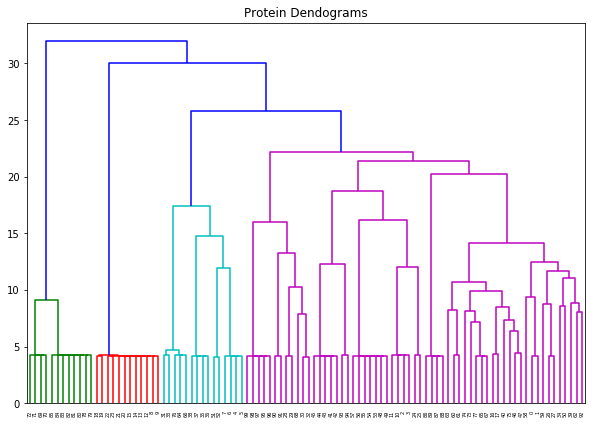

In [169]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Protein Dendograms")
dend = shc.dendrogram(shc.linkage(arr_for_dendrogram, method='ward'))